In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the data downloaed from mangodb

df = pd.read_csv(r"C:\Users\user\Desktop\Flask_hosp_web\user_data.csv")
df.head()

_id  age  gender  total_income  expenses utilities  \
0  65dce0ff611655f566da97f7   38    male        200000       NaN        on   
1  65dce21f611655f566da97f8   76    male         31000       NaN       NaN   
2  65dce233611655f566da97f9   64   other         70000       NaN        on   
3  65dce24c611655f566da97fa   68  female         75000       NaN        on   
4  65dce25d611655f566da97fb   55    male        100000       NaN       NaN   

  entertainment school_fees shopping healthcare  
0            on          on       on         on  
1           NaN         NaN      NaN        NaN  
2           NaN         NaN      NaN         on  
3           NaN         NaN       on         on  
4            on         NaN      NaN         on

### Visualization of Ages with higher income

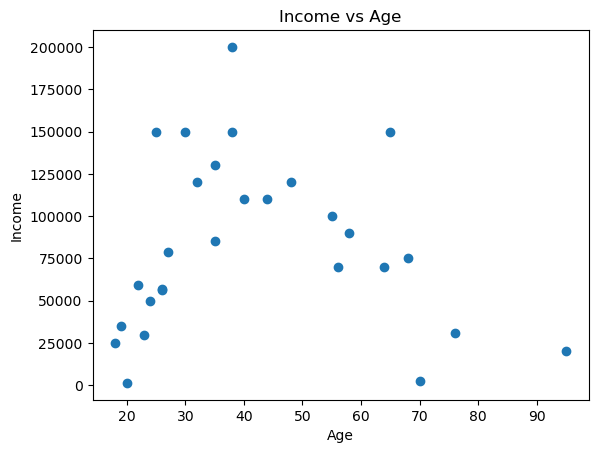

In [3]:
# Scatter plot showing how income is distributed for different ages:

plt.scatter(df['age'], df['total_income'])
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

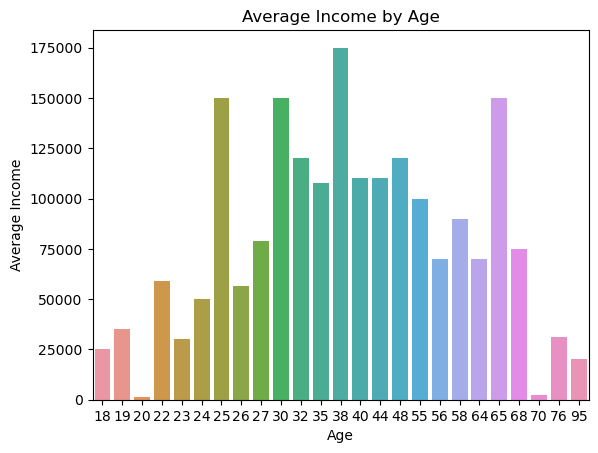

In [4]:
# Group by age and calculate the mean income for each age group
age_income_mean = df.groupby('age')['total_income'].mean().reset_index()

# Plotting using Seaborn
sns.barplot(x='age', y='total_income', data=age_income_mean)
plt.title('Average Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.show()

The bar plot shows that the ages between 28 to 44 years have a higher income on average

### Visualization of Gender distribution across spending categories.

In [5]:
# Viewing the columns available on the dataset:
df.columns

Index(['_id', 'age', 'gender', 'total_income', 'expenses', 'utilities',
       'entertainment', 'school_fees', 'shopping', 'healthcare'],
      dtype='object')

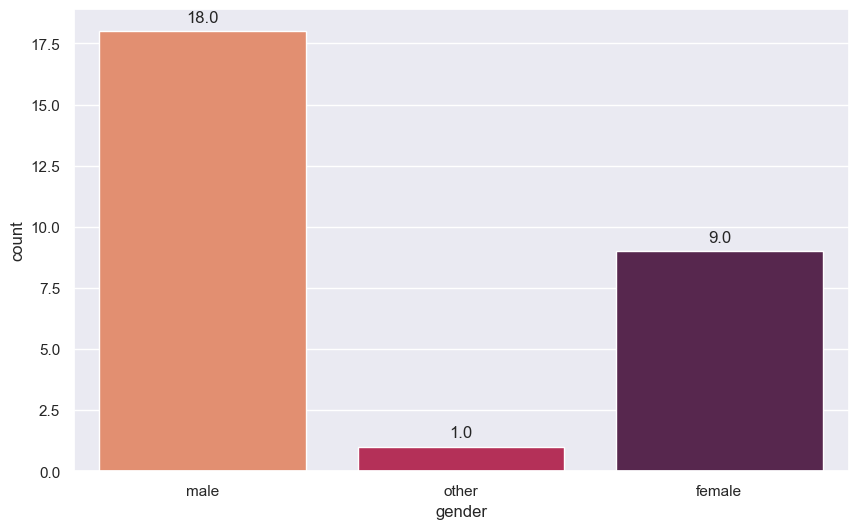

In [10]:
# Plot of the available gender population in the dataset:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6))
g=sns.countplot(x="gender", data=df,palette ="rocket_r")
# Add count annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [12]:
# Creating dataset with spending categoris from df:
exp = df[['gender','expenses', 'utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']]
exp.head()

gender  expenses utilities entertainment school_fees shopping healthcare
0    male       NaN        on            on          on       on         on
1    male       NaN       NaN           NaN         NaN      NaN        NaN
2   other       NaN        on           NaN         NaN      NaN         on
3  female       NaN        on           NaN         NaN       on         on
4    male       NaN       NaN            on         NaN      NaN         on

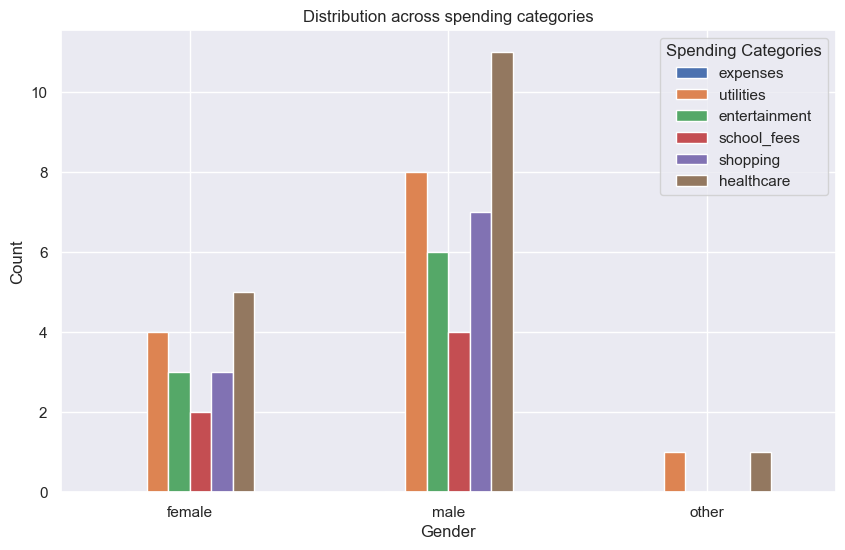

In [13]:
# Gender distribution across spending categories
gender_counts = exp.groupby('gender').count()

# Plot a bar chart
dt =gender_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Distribution across spending categories')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Spending Categories')
plt.show()

# Exporting slides to PowerPoint

In [17]:
from pptx import Presentation
from pptx.util import Inches
import os

# Create a PowerPoint presentation
presentation = Presentation()

# Create slides for each visual
def add_plot_slide(ax, title):
    slide = presentation.slides.add_slide(presentation.slide_layouts[5])
    title_box = slide.shapes.title
    title_box.text = title
    
    image_path = 'temp.png'
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0.1)
    slide.shapes.add_picture(image_path, Inches(0), Inches(1), width=Inches(8))
    plt.close()
    return slide

# Visual 1: Bar chart - Average Income by Age
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='age', y='total_income', data=age_income_mean, ax=ax)
plt.title('Average Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Income')
slide = add_plot_slide(ax, 'Average Income by Age')

# Visual 2: Bar chart with counts - Distribution across spending categories
f, ax = plt.subplots(figsize=(10, 6))
ax = gender_counts.plot(kind='bar', ax=ax)
slide = add_plot_slide(ax, 'Distribution across spending categories')

# Specify the full path to the desired folder
folder_path = r'C:\Users\user\Desktop\Flask_hosp_web'

# Save the PowerPoint presentation in the specified folder
presentation_path = os.path.join(folder_path, 'visuals_presentation.pptx')
presentation.save(presentation_path)
print("Presentation saved successfully on the specified folder")

Presentation saved successfully on the specified folder
